In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("ggplot")
%matplotlib inline

In [2]:
column_names = [
    "lat", 
    "lon", 
    "id", 
    "source_id", 
    "account_id", 
    "title", 
    "created_on", 
    "updated_on", 
    "start_ts", 
    "until_ts",
    "report_type",
    "notes", 
    "layer_id",
    "severity"
]

In [83]:
df = pd.read_table("reports_12DEC16-26DEC16.txt", header=None, names=column_names)
df.dropna(axis=0, how="any", inplace=True)

In [84]:
print df.describe()

                lat           lon      start_ts      until_ts
count  98996.000000  98996.000000  9.899600e+04  9.899600e+04
mean      29.358592      8.210241  1.482146e+09  1.482408e+09
std       20.814869     77.568550  3.575116e+05  3.517562e+05
min      -90.000000   -179.966700  1.479071e+09  1.481587e+09
25%       21.195940    -76.905670  1.481847e+09  1.482106e+09
50%       35.000000     21.093750  1.482142e+09  1.482401e+09
75%       41.013840     70.000000  1.482431e+09  1.482691e+09
max       85.000000    179.416670  1.487462e+09  1.487808e+09


In [85]:
print df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98996 entries, 0 to 127327
Data columns (total 14 columns):
lat            98996 non-null float64
lon            98996 non-null float64
id             98996 non-null object
source_id      98996 non-null object
account_id     98996 non-null object
title          98996 non-null object
created_on     98996 non-null object
updated_on     98996 non-null object
start_ts       98996 non-null float64
until_ts       98996 non-null float64
report_type    98996 non-null object
notes          98996 non-null object
layer_id       98996 non-null object
severity       98996 non-null object
dtypes: float64(4), object(10)
memory usage: 11.3+ MB
None


In [86]:
print df.tail()

              lat         lon                      id  \
127323  17.823540   80.201640  4iPRjyXM5hGbCtUN+RcZ4Q   
127324  61.441140 -135.159450  pkNIeHDK5hGbdBXRy13KCQ   
127325  67.269167   14.365278  4hkG2R_C5hGDQQ_Ry13KCQ   
127326 -37.818230  144.966900  voujXITB5hGeMgnRy13KCQ   
127327  47.305997 -122.514200  pJsC7OvK5hGScicX_zs7xg   

                       source_id              account_id  \
127323  586176614d49f90305094db3                  GLOBAL   
127324  585eb0e04d49f92eef486184                  GLOBAL   
127325                    139889  2WtVbwcebkyXxPOJYCHndQ   
127326                    139855  2WtVbwcebkyXxPOJYCHndQ   
127327                    140407  2WtVbwcebkyXxPOJYCHndQ   

                                                    title  created_on  \
127323                   Villagers say no to ₹1 a kg rice  1482837250   
127324  Windsor Islamic Council condemns ISIS call to ...  1482649520   
127325  Bodø Airport fire and rescue staff threaten st...  1481735272   
1273

In [87]:
location_df = df[["lat", "lon"]]

In [88]:
location_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98996 entries, 0 to 127327
Data columns (total 2 columns):
lat    98996 non-null float64
lon    98996 non-null float64
dtypes: float64(2)
memory usage: 2.3 MB


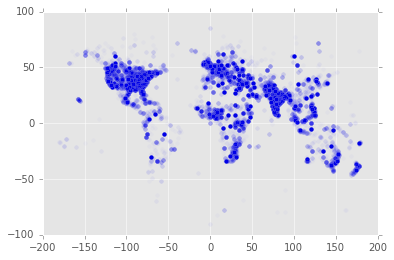

In [89]:
plt.scatter(location_df["lon"], location_df["lat"], alpha=0.02)


In [105]:
start_timeseries = pd.Series(np.ones(len(df))).reindex(
        pd.to_datetime(
            df["start_ts"], unit="s", errors="ignore"),
        fill_value=1
)
ts = start_timeseries["2016-12-12":"2016-12-27"]

create_timeseries = pd.Series(np.ones(len(df))).reindex(
        pd.to_datetime(
            df["created_on"].astype(int), unit="s", errors="ignore"),
        fill_value=1
)
c_ts = create_timeseries["2016-12-12":"2016-12-27"]

In [106]:
daily = ts.resample("d").sum()
hourly = ts.resample("H").sum()
ten_mins = ts.resample("10T").sum()

c_daily = c_ts.resample("d").sum()
c_hourly = c_ts.resample("H").sum()
c_ten_mins = c_ts.resample("10T").sum()

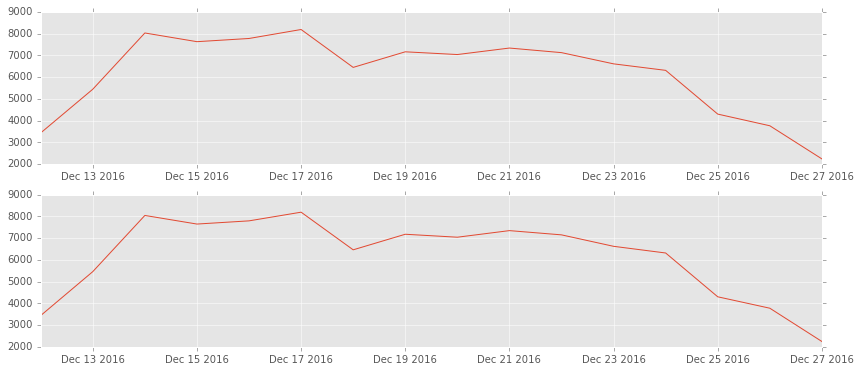

In [102]:
fig, axes = plt.subplots(2, figsize=(14,6))
axes[0].plot(daily)
axes[1].plot(c_daily)

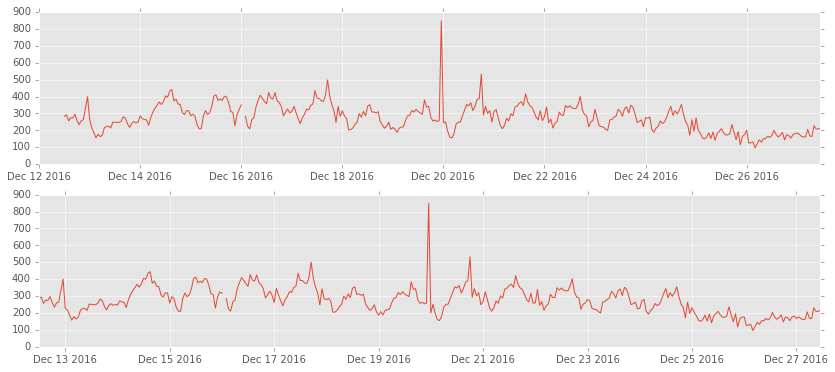

In [103]:
fig, axes = plt.subplots(2, figsize=(14,6))
axes[0].plot(hourly)
axes[1].plot(c_hourly)

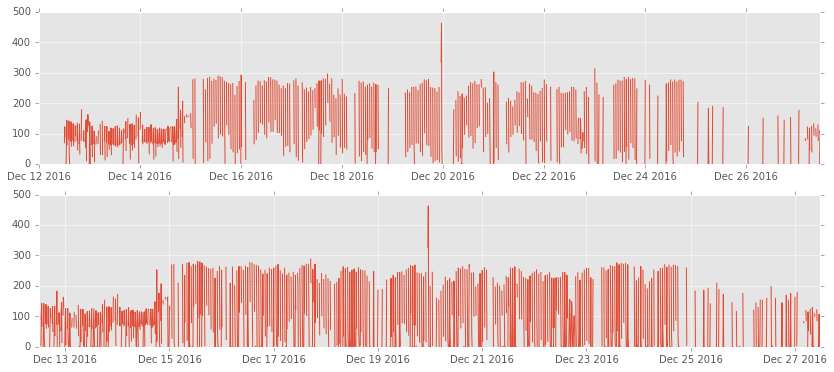

In [104]:
fig, axes = plt.subplots(2, figsize=(14,6))
axes[0].plot(ten_mins)
axes[1].plot(c_ten_mins)
